In [1]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_climate =pd.read_csv('./jena_climate_2009_2016.csv')
df_climate.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [3]:
df_climate.isnull().any()

Date Time          False
p (mbar)           False
T (degC)           False
Tpot (K)           False
Tdew (degC)        False
rh (%)             False
VPmax (mbar)       False
VPact (mbar)       False
VPdef (mbar)       False
sh (g/kg)          False
H2OC (mmol/mol)    False
rho (g/m**3)       False
wv (m/s)           False
max. wv (m/s)      False
wd (deg)           False
dtype: bool

In [4]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
Date Time          420551 non-null object
p (mbar)           420551 non-null float64
T (degC)           420551 non-null float64
Tpot (K)           420551 non-null float64
Tdew (degC)        420551 non-null float64
rh (%)             420551 non-null float64
VPmax (mbar)       420551 non-null float64
VPact (mbar)       420551 non-null float64
VPdef (mbar)       420551 non-null float64
sh (g/kg)          420551 non-null float64
H2OC (mmol/mol)    420551 non-null float64
rho (g/m**3)       420551 non-null float64
wv (m/s)           420551 non-null float64
max. wv (m/s)      420551 non-null float64
wd (deg)           420551 non-null float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [5]:
df_climate.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [6]:
df_climate.iloc[:,2].head() # 온도

0   -8.02
1   -8.41
2   -8.51
3   -8.31
4   -8.27
Name: T (degC), dtype: float64

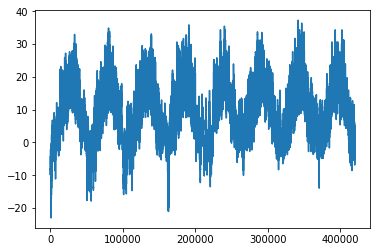

In [7]:
df_climate[df_climate.columns[2]].plot()

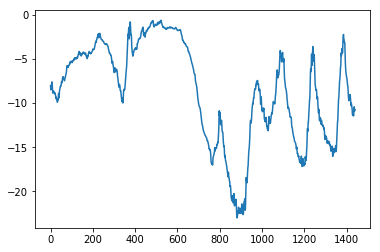

In [8]:
df_climate.iloc[:1440,2].plot() #처음 10일간 온도데이터

In [26]:
#i for i in df.colunms if in 'apple'
#[col for col in df_climate.columns if not in 'Date']
df_climate.iloc[:2, 1:]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1


In [27]:
# 총 42만개중 20만개 train, 10만개 valid, 나머지 test
train_num = 200000
valid_num = 100000
df_scaled = df_climate.iloc[:,1:].copy() # Date 제외

mean = df_climate.iloc[:train_num, 1:].mean(axis=0)
df_scaled -= mean
std = df_climate.iloc[:train_num, 1:].std(axis=0)
df_scaled /= std

In [28]:
df_scaled.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,0.900145,-1.931354,-1.982105,-1.862796,1.072850,-1.307418,-1.473754,-0.798684,-1.476264,-1.478152,2.123745,-0.729503,-0.780678,-0.276135
1,0.906041,-1.975409,-2.025665,-1.915825,1.078828,-1.320424,-1.495192,-0.800750,-1.495021,-1.499318,2.171993,-0.931238,-0.887943,-0.463173
2,0.901324,-1.986705,-2.036834,-1.920011,1.108719,-1.323025,-1.497574,-0.802816,-1.498772,-1.501669,2.182349,-1.276140,-1.261224,-0.053306
3,0.898966,-1.964113,-2.013379,-1.886519,1.126654,-1.316522,-1.483282,-0.804882,-1.483767,-1.487559,2.157636,-1.178526,-1.317002,0.251496
4,0.898966,-1.959594,-2.010028,-1.882333,1.120676,-1.315222,-1.480900,-0.804882,-1.483767,-1.485207,2.153165,-1.191541,-1.261224,0.439689


In [30]:
df_scaled.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,0.038491,0.042112,0.038693,0.070795,0.039110,0.025139,0.056407,-0.008988,0.055220,0.055270,-0.034163,-0.292047,-0.220088,-0.017010
std,0.985617,0.951522,0.949874,0.939269,0.984984,1.006484,0.996682,1.011672,0.996430,0.996077,0.940838,42.590006,29.612374,1.000788
min,-8.877632,-3.624657,-3.635134,-4.110953,-3.730658,-1.616945,-2.026386,-0.844136,-2.016468,-2.023768,-3.720127,-6508.334156,-4291.697971,-2.034523
25%,-0.552607,-0.645844,-0.638461,-0.587305,-0.606435,-0.728682,-0.735323,-0.664397,-0.733482,-0.732633,-0.706638,-0.755533,-0.776387,-0.592483
50%,0.081793,0.038707,0.036153,0.107657,0.235897,-0.203267,-0.104084,-0.391690,-0.106995,-0.104704,-0.087653,-0.254449,-0.261516,0.252651
75%,0.687892,0.722128,0.713001,0.784476,0.839699,0.548440,0.727246,0.250825,0.722070,0.725479,0.594406,0.461385,0.502210,0.668291
max,3.120545,3.185833,3.148984,2.604214,1.473391,6.552993,4.531355,8.661363,4.597288,4.565957,4.142858,17.140326,8.551367,2.121876


In [63]:
df_scaled.shape

(420551, 14)

In [64]:
df_scaled.values

array([[ 0.90014522, -1.93135363, -1.98210541, ..., -0.7295027 ,
        -0.78067778, -0.27613534],
       [ 0.90604113, -1.97540887, -2.02566494, ..., -0.93123784,
        -0.88794266, -0.46317327],
       [ 0.90132441, -1.98670509, -2.03683405, ..., -1.27613985,
        -1.26122447, -0.0533062 ],
       ...,
       [ 1.28927529, -1.38235748, -1.4672094 , ..., -0.69696478,
        -0.67341289,  0.45007984],
       [ 1.2880961 , -1.503227  , -1.58671889, ..., -0.43015378,
        -0.60476336,  0.57246269],
       [ 1.28927529, -1.56987468, -1.65149973, ..., -0.599351  ,
        -0.69057527,  0.10024964]])

In [ ]:
# 입력: lookback 1440 (10일, 10*24*6) , 10일 동안의 데이터를 가지고
# 출력: dalay 144 (1일, 24*6), 1일뒤의 온도를 예측한다.
# step: 데이터 샘플링 간격 6 (1시간에 하나의 데이터 포인트만 추출)

In [94]:
def generator(data, lookback, delay, min_index, max_index, shuffle= False, batch_size= 128, step=6):
    
    if max_index is None:
        max_index= len(data)-delay-1
    i= min_index+lookback
    
    while 1:
        
        if shuffle:
            rows= np.random.randint(min_index+lookback, max_index, size=batch_size)
        else:
            if i+batch_size >= max_index:
                i= min_index+lookback
            rows= np.arange(i, min(i+batch_size, max_index))
            i += len(rows)
        
        samples= np.zeros((len(rows), lookback//step, data.shape[-1]))
        targets= np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices= range(rows[j]- lookback, rows[j], step)
            samples[j]= data[indices]
            targets[j]= data[rows[j]+delay][1]
        
        yield samples, targets


In [99]:
lookback= 1440
step= 6
delay= 144
batch_size= 128
train_gen= generator(df_scaled.values, lookback= lookback, delay= delay,
                   min_index=0, max_index= 200000, shuffle= True, step= step, batch_size=batch_size)
val_gen= generator(df_scaled.values, lookback= lookback, delay= delay,
                   min_index=200001, max_index= 300000, step= step, batch_size=batch_size)
test_gen= generator(df_scaled.values, lookback= lookback, delay= delay,
                   min_index=300001, max_index= None, step= step, batch_size=batch_size)

val_steps= (300000-200001-lookback)//batch_size
test_steps= (len(df_scaled)-300001-lookback)//batch_size


In [ ]:
# for samples, targets in train_gen:
#     print(samples)
#     print(targets)
#     break

In [67]:
def evaluate_baseline_model():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets)) # MAE
        batch_maes.append(mae)
    print(np.mean(batch_maes))

evaluate_baseline_model()
# 0.289

0.28973524864971095


In [98]:
(200000-lookback)//batch_size

1551

In [103]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import RMSprop

keras.backend.clear_session()

model= Sequential()
model.add(Flatten(input_shape=(lookback // step, df_scaled.shape[-1]))) # 입력값 (240, 14)
model.add(Dense(32, activation='relu')) 
model.add(Dense(1))
model.compile(optimizer=RMSprop(), loss='mae') # 회귀
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3360)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                107552    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 107,585
Trainable params: 107,585
Non-trainable params: 0
_________________________________________________________________


In [104]:
history= model.fit_generator(train_gen, steps_per_epoch= 500, epochs= 20, validation_data= val_gen, validation_steps= val_steps)

Epoch 1/20
500/500 [==============================] - 19s 38ms/step - loss: 1.7195 - val_loss: 0.9327
Epoch 2/20
500/500 [==============================] - 20s 40ms/step - loss: 0.6337 - val_loss: 0.3293
Epoch 3/20
500/500 [==============================] - 22s 44ms/step - loss: 0.3306 - val_loss: 0.3155
Epoch 4/20
500/500 [==============================] - 19s 39ms/step - loss: 0.2773 - val_loss: 0.3337
Epoch 5/20
500/500 [==============================] - 18s 36ms/step - loss: 0.2606 - val_loss: 0.3116
Epoch 6/20
500/500 [==============================] - 17s 34ms/step - loss: 0.2505 - val_loss: 0.3117
Epoch 7/20
500/500 [==============================] - 17s 35ms/step - loss: 0.2435 - val_loss: 0.3058
Epoch 8/20
500/500 [==============================] - 17s 34ms/step - loss: 0.2358 - val_loss: 0.3164
Epoch 9/20
500/500 [==============================] - 16s 33ms/step - loss: 0.2325 - val_loss: 0.3264
Epoch 10/20
500/500 [==============================] - 18s 35ms/step - loss: 0.226

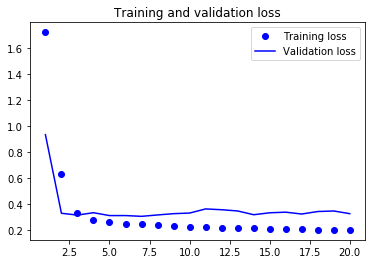

In [105]:
#acc = history.history['acc']
#val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [107]:
from keras import layers

keras.backend.clear_session()

model= Sequential()
# model.add(Flatten(input_shape=(lookback // step, df_scaled.shape[-1]))) # 입력값 (240, 14)
# model.add(Dense(32, activation='relu')) 

model.add(layers.GRU(32, input_shape=(None, df_scaled.shape[-1])))
model.add(Dense(1))
model.compile(optimizer=RMSprop(), loss='mae') # 회귀
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                4512      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [108]:
history= model.fit_generator(train_gen, steps_per_epoch= 500, epochs= 20, validation_data= val_gen, validation_steps= val_steps)

Epoch 1/20
500/500 [==============================] - 103s 207ms/step - loss: 0.2986 - val_loss: 0.2674
Epoch 2/20
500/500 [==============================] - 102s 205ms/step - loss: 0.2839 - val_loss: 0.2687
Epoch 3/20
500/500 [==============================] - 102s 205ms/step - loss: 0.2783 - val_loss: 0.2669
Epoch 4/20
500/500 [==============================] - 111s 221ms/step - loss: 0.2720 - val_loss: 0.2639
Epoch 5/20
500/500 [==============================] - 109s 219ms/step - loss: 0.2683 - val_loss: 0.2741
Epoch 6/20
500/500 [==============================] - 104s 209ms/step - loss: 0.2654 - val_loss: 0.2648
Epoch 7/20
500/500 [==============================] - 105s 210ms/step - loss: 0.2599 - val_loss: 0.2661
Epoch 8/20
500/500 [==============================] - 105s 209ms/step - loss: 0.2569 - val_loss: 0.2686
Epoch 9/20
500/500 [==============================] - 109s 218ms/step - loss: 0.2535 - val_loss: 0.2672
Epoch 10/20
500/500 [==============================] - 101s 202m

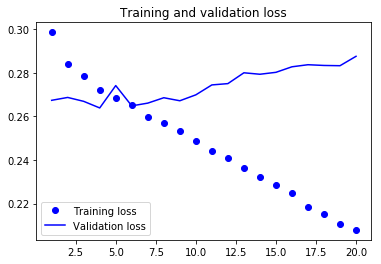

In [109]:
#acc = history.history['acc']
#val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()